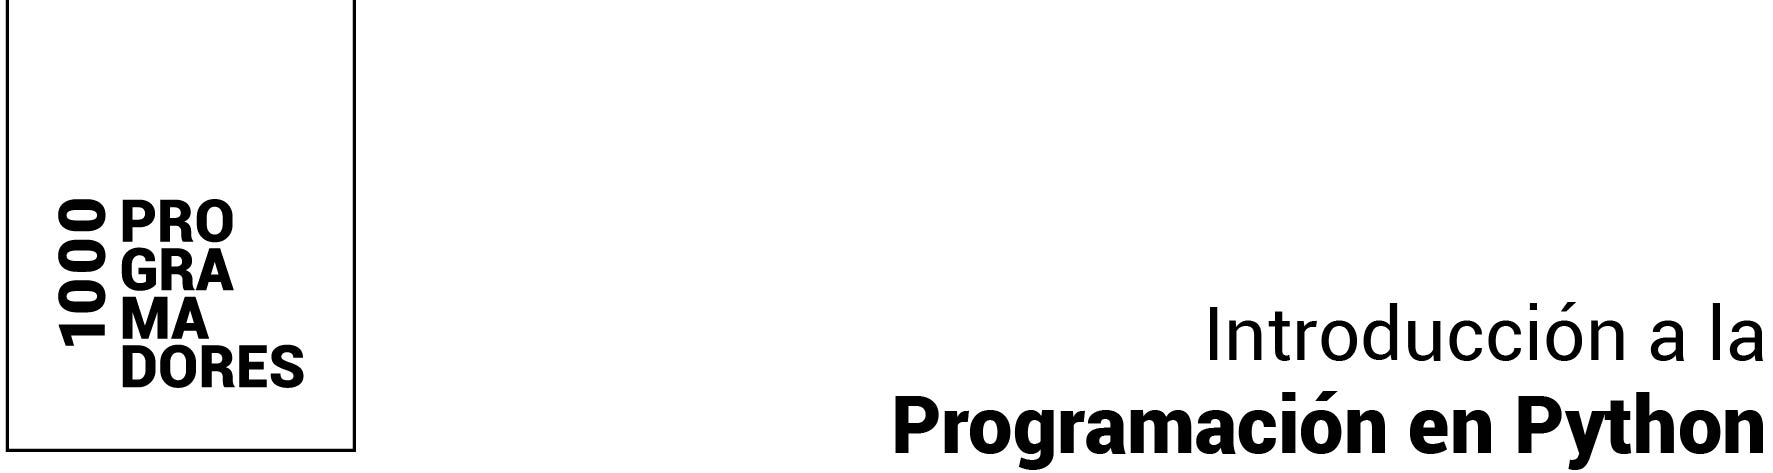

# **Trabajo Practico - Módulo Nro 6 - Bases de Datos**

## Temas: Consultas sql, conexión, crud.


In [ ]:
from google.colab import drive
if not (drive.mount('/content/drive')):
    drive.mount('/content/drive')

raiz = "/content/drive/MyDrive"

In [ ]:
import sqlite3 as sql

class Conexion_BD():

    def __init__(self,bd):#bd es el nombre de la base de datos
        self.conexion = sql.connect(bd)
        self.cursor = self.conexion.cursor()

    def consulta(self, consulta):
        self.cursor.execute(consulta)
    
    def commit(self):
        self.conexion.commit()

    def cerrar(self):
        self.conexion.close()

### **Ejercicio N° 1**
Crear una tabla “Productos” que contenga los datos que le permite
a un bazar llevar el control de los productos que comercializa.

*   Productos ( id_producto, nombre_producto, cantidad_producto, precio_producto, categoria_producto).


Con el código de conexión siguiente, realiza la creación de la tabla en la base de datos "Productos_bd"

# **Ejercicio N° 2**
Una vez Creada la base de datos "Productos.db" y la tabla "Productos" hacer las siguientes actividades:


*   Insertar un producto
*   Hacer por lo menos una consulta de busqueda ejemplo: "ver todos los productos cargados", "ver los productos con stock 0"
*   Actualizar un producto
*   Eliminar un producto



# **Ejercicio N° 3**
Para la misma base de datos de ejercicios anteriores, crear una
tabla que se llame Detalle_Venta, que contenga los siguientes campos:
id_venta, precio_producto, cantidad, subtotal y total, de forma que permita armar el detalle de una factura y mostrar en pantalla.

* Crear la tabla Detalle_Venta.
* Insertar datos simulados en la tabla Detalle_Venta.

# **Ejercicio N° 4**
Crear un pequeño programa que te permita hacer una venta usando
las tablas Productos y Detalle_Venta, considerar:

1.  Stock distinto de 0 al hacer la venta.
2.  Guardar en Detalle_Venta la venta realizada.


# **EJEMPLO de un pequeño sistema de control de productos**
Una vez defenido una base de datos y las tablas que la componen solo resta hacer que interactuen entre ellas para poder dar solución a una parte de la "situacion/problema" planteada por el cliente. En este caso un bazar. **El cual solicita llevar el control de sus productos**.
En este ejemplo se muestra como la aplicacion hace las consultas necesarias para poder llevar a cabo todas las acciones que despues se veran reflejada en las tablas. 


In [ ]:
def nuevo_producto(item,N=0):
    conexion_producto.consulta(f'INSERT INTO Productos VALUES(NULL,"{item.nombre}",{item.cantidad},{item.precio},"{item.categoria}")')
    conexion_producto.consulta('SELECT id_producto FROM Productos ORDER BY id_producto DESC LIMIT 1')
    id = conexion_producto.cursor.fetchall()
    conexion_producto.commit()
    if N == 0:
        print(f"""Producto:
        Item nro: {id[0][0]}
        Nombre: {item.nombre}
        Stock: {item.cantidad}
        Precio: ${item.precio}
        Categoria: {item.categoria}
        Fue ingresado correctamente!!!""")
        input("precione cualquier tecla para volver al menú principal ")
        menu_principal()
  

def lista_producto():
    try:
        nombre_archivo = input("Ingrese el nombre del archivo: ")
        print("leyendo archivo....")
        lista = pd.read_csv(nombre_archivo + '.csv', header=0)
    except:
        print("El archivo no existe!!!")
        src = list(files.upload().values())[0]
        lista_producto()
    for i in range(len(lista)):
        item = Productos()
        item.nombre = lista.loc[i][0]
        item.cantidad = int(lista.loc[i][1])
        item.precio = float(lista.iloc[i][2])
        item.categoria = lista.iloc[i][3]
        if i == (len(lista)-1):
            print("Ultimo elemento cargado:")
            N = 0
        else:
            N = len(lista)-i
        nuevo_producto(item,N)
        del item
    pass
  
  


In [ ]:
def menu_principal():
    opciones = {0:salir, 1:ingresar_mercaderia, 2:vender, 3:editar, 4:eliminar, 5:ver_productos, 6:disponibilidad}
    print("Sistema de control de producto!!!")
    print("**********************************")
    print("*********Menú de Opciones*********")
    print("1 - Ingresar Mercaderia Nueva")
    print("2 - Vender productos")
    print("3 - Editar un producto")
    print("4 - Eliminar un producto")
    print("5 - Ver Lista de Productos")
    print("6 - Ver disponibilidad de stock")
    print("0 - Salir")
    print("***********************************")
    op = int(input("Seleccione la opción deseada: "))
    opciones.get(op,error)()

def salir():
    conexion_producto.cerrar()
    print("Gracias por usar nuestro sistema!!!")

def ingresar_mercaderia():
    print("\n*******Ingresar Producto*******")
    print("1 - Ingresar un producto")
    print("2 - Ingresar una lista")
    print("3 - volver al menú principal")
    print("*********************************")
    op = int(input("Seleccione la opción deseada: "))
    if op == 1:
        item = Productos()
        item.ingresar_datos()
        nuevo_producto(item)
    elif op == 2:
        lista_producto()
    elif op == 3:
        menu_principal()
    else:
        print("Eliga una de las opciones establecidas!!!")
        ingresar_mercaderia()

def guardar(lista,total):
    fecha = (datetime.now()).date()
    conexion_producto.consulta(f'INSERT INTO Ventas VALUES(NULL,"{fecha}",{total})')
    conexion_producto.consulta('SELECT id_venta FROM Ventas ORDER BY id_venta DESC LIMIT 1')
    id = conexion_producto.cursor.fetchall()
    for item in lista:
        conexion_producto.consulta(f'INSERT INTO Detalles_Venta VALUES(NULL,{id[0][0]},"{item.nombre}",{item.cantidad},{item.precio})')
    conexion_producto.commit()
    return True

def vender():
    cant_pro = 0
    total = 0
    lista = []
    vender = True
    while vender:
        item = Productos()
        try:
            codigo = int(input('Ingresar un codigo: '))
        except:
            print("Ingrese un codigo númerico valido!!!")
            vender()
            conexion_producto.consulta(f'SELECT * FROM Productos WHERE id_producto = {codigo}')
        try:
            consulta = conexion_producto.cursor.fetchall()
        except:
            print("El codigo indicado no EXISTE!!!")
            vender()
        conexion_producto.commit()
        item.definir_producto(consulta)
        print("****************Producto****************")
        print(f"{item.nombre} - ${item.precio}")
        cantidad = int(input("Ingrese al Cantidad Deceada: "))
        print("****************************************")
        print("***********Lista de Productos***********")
        if cantidad < item.cantidad:
            lista.append(item)
            del item
            lista[-1].cantidad = cantidad
            i = 1
        for item in lista:
            print(f"{i} - {item.cantidad} - {item.nombre} - ${item.precio} - ${item.precio * item.cantidad}")
            i +=1
            cant_pro += 1
            total += (lista[-1].precio * cantidad)
        else:
            print("Supera la cantidad disponible!!!")
            resp = input("Igresar otro producto? (s/S): ")
            resp = resp.upper()
        if resp != 'S':
            vender = False
            print("****************************************")
    if lista:
        print(f"Monto total = ${total}")
        for item in lista:
            conexion_producto.consulta(f'UPDATE Productos SET cantidad_producto = cantidad_producto - {item.cantidad} WHERE id_producto = {item.codigo}')
            conexion_producto.commit()
            resultado = guardar(lista, total)
        if resultado:
            print("Venta Guardada Correctamente!!!")
        else:
            print("Hubo un error al cargar la venta pero se desconto STOCK!!")
    else:
        print("La venta se CANCELO!!!!")
    input("precione cualquier tecla para volver al menú principal ")
    menu_principal()
  
def editar():
    try:
        codigo = int(input("Ingresar el codigo de producto a editar: "))
    except:
        print("Ingresar un codigo valido!!!")
        editar()
    item = Productos()
    conexion_producto.consulta(f'SELECT * FROM Productos WHERE id_producto = {codigo}')
    try:
        consulta = conexion_producto.cursor.fetchall()
    except:
        print("El codigo indicado no EXISTE!!!")
        editar()
    conexion_producto.commit()
    item.definir_producto(consulta)
    print("****************EDITAR*****************")
    print("Dejar vacio los campos sin modificar!!!")
    item.editar()
    print("***************************************")
    conexion_producto.consulta(f'UPDATE Productos SET nombre_producto ="{item.nombre}", cantidad_producto = {item.cantidad}, precio_producto = {item.precio}, categoria_producto = "{item.categoria}" WHERE id_producto = {codigo}')
    conexion_producto.commit()
    print("Producto Actualizado!!!")
    input("precione cualquier tecla para volver al menú principal ")
    menu_principal()

def eliminar():
    try:
        codigo = int(input("Ingresar el codigo de producto a Eliminar: "))
    except:
        print("Ingresar un codigo valido!!!")
        editar()
    item = Productos()
    conexion_producto.consulta(f'SELECT * FROM Productos WHERE id_producto = {codigo}')
    consulta = conexion_producto.cursor.fetchall()
    conexion_producto.commit()
    item.definir_producto(consulta)
    print("****************ELIMINAR*****************")
    print("Se ELIMINARA el siguiente ITEM:")
    print(item)
    print("***************************************")
    resp = input("Esta seguro de borrarlo? (s/S) ")
    resp = resp.upper()
    if resp == 'S':
        conexion_producto.consulta(f'DELETE FROM Productos WHERE id_producto = {codigo}')
        conexion_producto.commit()
        print("Producto Eliminado!!!")
    else:
        print("opcion cancelada!!!")
    input("precione cualquier tecla para volver al menú principal ")
    menu_principal()
  
def ver_productos():
    conexion_producto.consulta('SELECT * FROM Productos ORDER BY categoria_producto ASC')
    lista_producto = conexion_producto.cursor.fetchall()
    conexion_producto.commit()
    print("NRO \t Codigo \t Nombre \t\t Cantidad \t Precio \t Categoria")
    i=1
    for item in lista_producto:
        print(f"{i} \t {item[0]} \t {item[1]} \t\t {item[2]} \t ${item[3]} \t {item[4]}")
        i += 1
    input("precione cualquier tecla para volver al menú principal ")
    menu_principal()

def disponibilidad():
  conexion_producto.consulta('SELECT nombre_producto, cantidad_producto FROM Productos WHERE cantidad_producto < 10 ORDER BY nombre_producto ASC')
  lista_producto = conexion_producto.cursor.fetchall()
  conexion_producto.commit()
  print("los productos con STOCK CRITICO SON: ")
  i = 1
  print("NRO \t Nombre \t\t Cantidad")
  for item in lista_producto:
    print(f"{i} \t {item[0]} \t\t {item[1]}")
    i += 1
  input("precione cualquier tecla para volver al menú principal ")
  menu_principal()

def error():
    print("Eliga una de las opciones establecidas!!!")
    menu_principal()

In [ ]:
from google.colab import files
import pandas as pd
import json
from datetime import datetime

conexion_producto = Conexion_BD('Productos.db')
try:
    conexion_producto.consulta('CREATE TABLE Productos(id_producto INTEGER PRIMARY KEY AUTOINCREMENT, nombre_producto TEXT, cantidad_producto INTEGER, precio_producto FLOAT, categoria_producto TEXT)')
    conexion_producto.consulta('CREATE TABLE Ventas(id_venta INTEGER PRIMARY KEY AUTOINCREMENT, fecha_venta DATE , total_venta FLOAT)')
    conexion_producto.consulta('CREATE TABLE Detalles_venta(id_detallev INTEGER PRIMARY KEY AUTOINCREMENT, idventa_detallev INTEGER, nombreproducto_detallev TEXT, cantidad_detallev INTEGER, precioproducto_detallev FLOAT)')
    conexion_producto.commit()
except:
      print("las Tablas ya fueron creadas")
class Productos:
    def __init__(self):
        self._codigo =0
        self.nombre = ''
        self.cantidad = 0
        self.precio = 0.0
        self.categoria = ''
  
    def codigo(self):
        return self._codigo
  
    def codigo(self,codigo):
        self._codigo = codigo

    def ingresar_datos(self):
        self.nombre = input("Ingresar nombre: ")
        self.cantidad = int(input("Ingresar cantidad: "))
        self.precio = float(input("Ingresar precio: "))
        self.categoria = input("ingresar categoria: ")
  
    def definir_producto(self,tupla):
        self._codigo = tupla[0][0]
        self.nombre = tupla[0][1]
        self.cantidad = tupla[0][2]
        self.precio = tupla[0][3]
        self.categoria = tupla[0][4]
  
    def editar(self):
        print(f"Nombre: {self.nombre}")
        valor = input("Ingresar nombre: ")
        if valor != '':
            self.nombre = valor
        print(f"Cantidad: {self.cantidad}")
        try:
            valor = int(input("Ingresar cantidad: "))
        except:
            valor = 0
        if valor != 0:
            self.cantidad = valor
        print(f"Precio: ${self.precio}")
        try:
            valor = float(input("Ingresar precio: "))
        except:
            valor = 0
        if valor != 0:
            self.precio = valor
        print(f"Categoria: {self.categoria}")
        valor = input("Ingresar categoria: ")
        if valor != '':
            self.categoria = valor
  
    def __str__(self):
        return f"""
        Nombre = {self.nombre}
        Cantidad = {self.cantidad}
        Precio = {self.precio}
        Categoria = {self.categoria}
        """

menu_principal()


las Tablas ya fueron creadas
Sistema de control de producto!!!
**********************************
*********Menú de Opciones*********
1 - Ingresar Mercaderia Nueva
2 - Vender productos
3 - Editar un producto
4 - Eliminar un producto
5 - Ver Lista de Productos
6 - Ver disponibilidad de stock
0 - Salir
***********************************
Seleccione la opción deseada: 5
1
NRO 	 Codigo 	 Nombre 		 Cantidad 	 Precio 	 Categoria
1 	 1 	 Zapatos Cavatini 		 100 	 $12000.0 	 Calzado
precione cualquier tecla para volver al menú principal 
Sistema de control de producto!!!
**********************************
*********Menú de Opciones*********
1 - Ingresar Mercaderia Nueva
2 - Vender productos
3 - Editar un producto
4 - Eliminar un producto
5 - Ver Lista de Productos
6 - Ver disponibilidad de stock
0 - Salir
***********************************
Seleccione la opción deseada: 0
Gracias por usar nuestro sistema!!!
